Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 204517.9219 - val_loss: 200287.8594
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 189779.0312 - val_loss: 173960.9062
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 151754.4688 - val_loss: 126567.4141
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 105195.3516 - val_loss: 85022.0234
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 72146.6562 - val_loss: 58187.8594
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 47794.9805 - val_loss: 35139.4531
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 26313.7480 - val_loss: 16806.2285
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12040.4395 - val_loss: 7881.6899
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6394.9893 - val_loss: 5154.5215
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4559.3486 - val_loss: 3942.4993
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6

<Axes: >

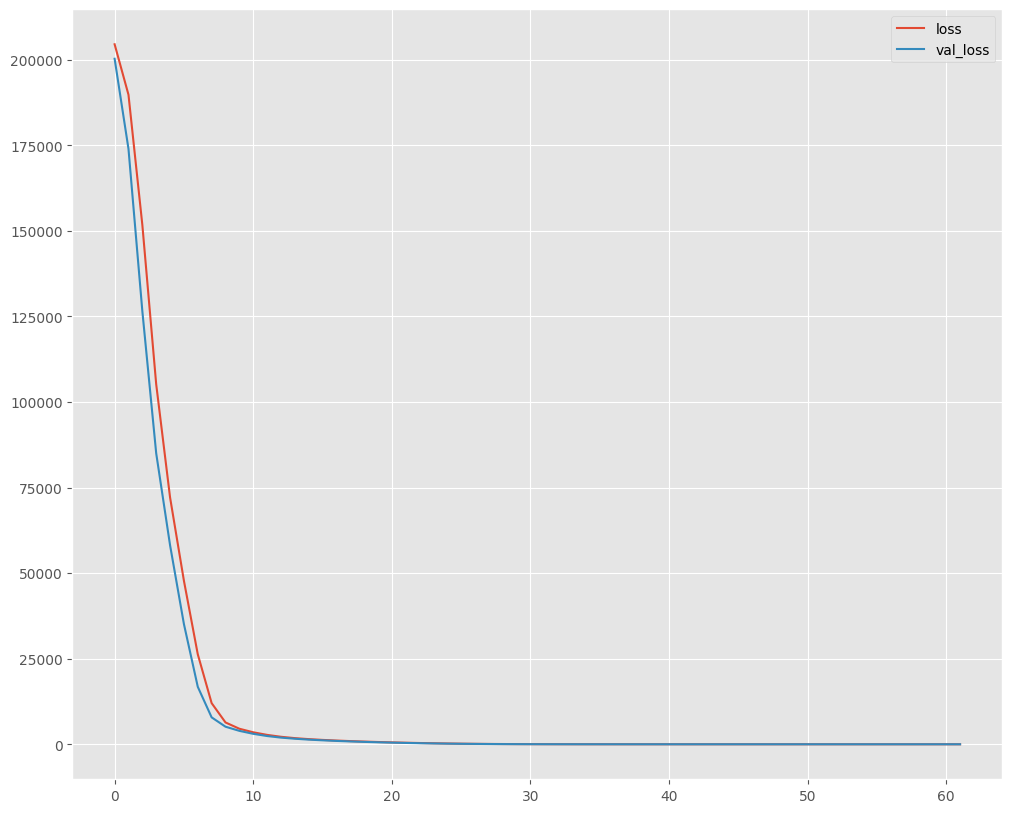

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("ccpp.csv")

df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum','AP': 'Ambient Pressure',
                   'RH': 'Relative Humidity ','PE': 'Net Hourly Electrical Energy Output'}, inplace=True)

predictors = df.drop("Net Hourly Electrical Energy Output", axis=1).values
targets = df["Net Hourly Electrical Energy Output"].values

X_train, X_test, y_train, y_test = train_test_split(predictors,targets, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def get_new_model():
  model = Sequential()
  model.add(Dense(6, activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(1))

  return model

model = get_new_model()
model.compile(optimizer = 'adam', loss="mean_squared_error")

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=4)

history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test), callbacks=[early_stopping_monitor])

plt.style.use("ggplot")
pd.DataFrame(model.history.history).plot(figsize=(12,10))


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(0, 0.5, 'Actual Values')

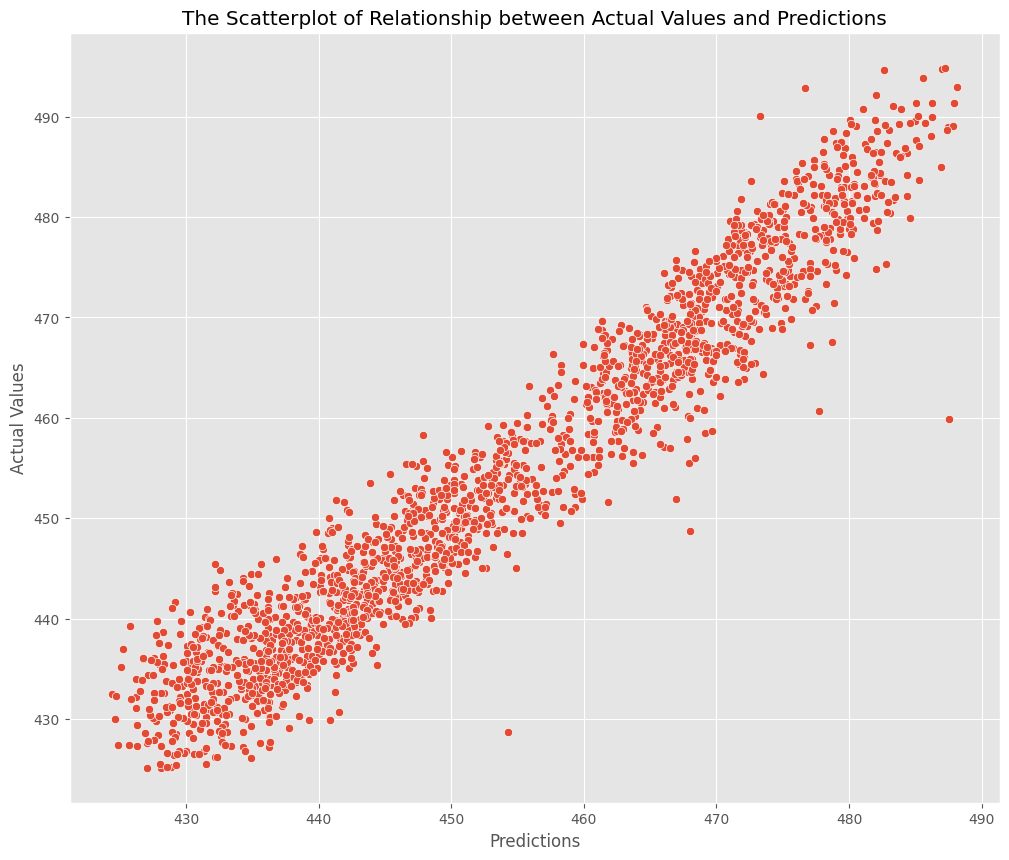

In [6]:
predictions = model.predict(X_test)
plt.figure(figsize=(12,10))
sns.scatterplot(x = np.ravel(predictions),y = y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [7]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print ("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
metrics.explained_variance_score(y_test, predictions)

MAE: 3.5038505179505863
MSE: 19.564708470062566
RMSE: 4.423201156409526


0.932834708837927